# TO DO: split the data into training and testing samples

### First, joing the test and train data into one, to split them and train the coding

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data_train = pd.read_csv("./data/train.csv")
data_test = pd.read_csv("./data/test.csv")

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB


In [5]:
data_train.columns == data_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
union_df = pd.concat([data_train, data_test], ignore_index=True, sort=False)

In [7]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2521 non-null   int64  
 1   baths           2521 non-null   float64
 2   size            2521 non-null   float64
 3   size_units      2521 non-null   object 
 4   lot_size        2097 non-null   float64
 5   lot_size_units  2097 non-null   object 
 6   zip_code        2521 non-null   int64  
 7   price           2521 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 157.7+ KB


In [8]:
union_df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [71]:
data = union_df.copy()

In [72]:
data.describe(include="all")

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
count,2521.000000,2521.000000,2521.000000,2521,2097.000000,2097,2521.000000,2.521000e+03
unique,NaN,NaN,NaN,1,NaN,2,NaN,NaN
top,NaN,NaN,NaN,sqft,NaN,sqft,NaN,NaN
freq,NaN,NaN,NaN,2521,NaN,1818,NaN,NaN
mean,2.877033,2.171956,1758.998017,NaN,3896.245794,NaN,98123.984927,9.668217e+05
std,1.247518,1.004397,921.608036,NaN,2714.651578,NaN,23.118736,8.870111e+05
min,1.000000,0.500000,250.000000,NaN,0.230000,NaN,98101.000000,1.590000e+05
25%,2.000000,1.500000,1086.000000,NaN,1263.000000,NaN,98108.000000,6.050000e+05
50%,3.000000,2.000000,1580.000000,NaN,4001.000000,NaN,98117.000000,8.130000e+05
75%,4.000000,2.500000,2270.000000,NaN,6000.000000,NaN,98126.000000,1.115000e+06


In [73]:
data["size_units"].value_counts()

size_units
sqft    2521
Name: count, dtype: int64

In [74]:
data["lot_size_units"].value_counts()

lot_size_units
sqft    1818
acre     279
Name: count, dtype: int64

In [76]:
data["zip_code"].unique()

array([98144, 98106, 98107, 98199, 98102, 98133, 98105, 98108, 98178,
       98103, 98177, 98115, 98122, 98119, 98117, 98116, 98146, 98109,
       98125, 98101, 98126, 98118, 98112, 98121, 98136, 98168, 98104,
       98164, 98188], dtype=int64)

##### I have to change the units to the same units, but first lets categorize zip codes accorgin to socioeconomic status and drop the columns not needed.

In [160]:
"""
Done by copilot, which claims that it is based 
on median household income of the areas under the given zipcode.
"""

seattle_zip_categories = {

   "98144": "middle lower",
    "98106": "middle lower",
    "98107": "middle upper",
    "98199": "affluent",
    "98102": "middle upper",
    "98133": "middle lower",
    "98105": "middle lower",
    "98108": "middle lower",
    "98178": "middle lower",
    "98103": "middle upper",
    "98177": "affluent",
    "98115": "middle upper",
    "98122": "middle lower",
    "98119": "middle upper",
    "98117": "affluent",
    "98116": "middle upper",
    "98146": "middle lower",
    "98109": "middle upper",
    "98125": "middle lower",
    "98101": "middle lower",
    "98126": "middle lower",
    "98118": "middle lower",
    "98112": "affluent",
    "98121": "affluent",
    "98136": "affluent",
    "98168": "lower",
    "98104": "lower",
    "98164": "affluent",
    "98188": "lower"

}

"""
Done by Copilot:
Core (0–2 miles): ZIPs immediately surrounding downtown.
Inner Ring (2–5 miles): Neighborhoods like Capitol Hill, Queen Anne, Beacon Hill.
Outer Ring (5–10 miles): Ballard, West Seattle, Northgate.
Suburban (10+ miles): Shoreline, Renton, Bellevue (if included).
"""

distance_zip_categories = {
    '98144': 'inner ring',
    '98106': 'inner ring',
    '98107': 'inner ring',
    '98199': 'inner ring',
    '98102': 'core',
    '98133': 'outer ring',
    '98105': 'inner ring',
    '98108': 'inner ring',
    '98178': 'outer ring',
    '98103': 'inner ring',
    '98177': 'outer ring',
    '98115': 'outer ring',
    '98122': 'core',
    '98119': 'inner ring',
    '98117': 'outer ring',
    '98116': 'inner ring',
    '98146': 'outer ring',
    '98109': 'core',
    '98125': 'outer ring',
    '98101': 'core',
    '98126': 'inner ring',
    '98118': 'outer ring',
    '98112': 'inner ring',
    '98121': 'core',
    '98136': 'outer ring',
    '98168': 'outer ring',
    '98104': 'core',
    '98164': 'core',
    '98188': 'suburban'
}


In [83]:
data["zip_code_category"] = data.apply(lambda row: seattle_zip_categories.get(str(row["zip_code"])), axis = 1)

In [79]:
data["distance_zip_category"] = data.apply(lambda row: distance_zip_categories.get(str(row["zip_code"])), axis = 1)

In [80]:
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,distance_zip_category
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0,inner ring
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0,inner ring
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0,inner ring
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0,inner ring
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,core


In [81]:
data["zip_code"].unique()

array([98144, 98106, 98107, 98199, 98102, 98133, 98105, 98108, 98178,
       98103, 98177, 98115, 98122, 98119, 98117, 98116, 98146, 98109,
       98125, 98101, 98126, 98118, 98112, 98121, 98136, 98168, 98104,
       98164, 98188], dtype=int64)

In [85]:
data[data["distance_zip_category"].isnull()]

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,distance_zip_category,zip_code_category


In [86]:
data.drop(columns=["zip_code","size_units"], inplace=True)

In [87]:
data.isnull().sum()

beds                       0
baths                      0
size                       0
lot_size                 424
lot_size_units           424
price                      0
distance_zip_category      0
zip_code_category          0
dtype: int64

##### What is the proportion potentially dropped?

In [88]:
424/2521

0.16818722729075763

In [89]:
data.dropna(axis=0, inplace=True)

In [90]:
data_no_missing_values = data.copy()

In [91]:
data_no_missing_values.head()

,beds,baths,size,lot_size,lot_size_units,price,distance_zip_category,zip_code_category
0,3,2.5,2590.0,6000.00,sqft,795000.0,inner ring,middle lower
1,4,2.0,2240.0,0.31,acre,915000.0,inner ring,middle lower
2,4,3.0,2040.0,3783.00,sqft,950000.0,inner ring,middle upper
3,4,3.0,3800.0,5175.00,sqft,1950000.0,inner ring,affluent
5,2,2.0,1190.0,1.00,acre,740000.0,inner ring,middle upper


In [92]:
conversion_factors = {
    'acre': 43560,
    'sqm': 10.7639,
    'sqft': 1
}

data_no_missing_values["lot_size_in_sqft"] = data_no_missing_values.apply (lambda row: row["lot_size"] * conversion_factors.get(row["lot_size_units"], 1), axis=1)

In [93]:
data_no_missing_values.columns

Index(['beds', 'baths', 'size', 'lot_size', 'lot_size_units', 'price',
       'distance_zip_category', 'zip_code_category', 'lot_size_in_sqft'],
      dtype='object')

In [94]:
data_no_missing_values.drop(columns=['lot_size', 'lot_size_units'], axis=1, inplace=True)

In [95]:
data_no_missing_values.rename(columns={"size": "size_in_sqft"}, inplace=True)

In [96]:
data_no_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2520
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   beds                   2097 non-null   int64  
 1   baths                  2097 non-null   float64
 2   size_in_sqft           2097 non-null   float64
 3   price                  2097 non-null   float64
 4   distance_zip_category  2097 non-null   object 
 5   zip_code_category      2097 non-null   object 
 6   lot_size_in_sqft       2097 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 131.1+ KB


In [97]:
data_no_missing_values.describe(include="all")

,beds,baths,size_in_sqft,price,distance_zip_category,zip_code_category,lot_size_in_sqft
count,2097.000000,2097.000000,2097.000000,2.097000e+03,2097,2097,2.097000e+03
unique,NaN,NaN,NaN,NaN,4,4,NaN
top,NaN,NaN,NaN,NaN,inner ring,middle lower,NaN
freq,NaN,NaN,NaN,NaN,989,907,NaN
mean,3.137339,2.305436,1916.727706,1.039809e+06,NaN,NaN,1.678385e+04
std,1.175945,1.010824,915.073679,9.415656e+05,NaN,NaN,2.571518e+05
min,1.000000,0.500000,250.000000,1.590000e+05,NaN,NaN,5.000000e+02
25%,2.000000,1.500000,1280.000000,6.850000e+05,NaN,NaN,3.000000e+03
50%,3.000000,2.000000,1740.000000,8.700000e+05,NaN,NaN,5.000000e+03
75%,4.000000,3.000000,2390.000000,1.180000e+06,NaN,NaN,7.407000e+03


### Here I have the data prepared for the final preprocessing - outliers cut.

In [98]:
data_clean = data_no_missing_values.copy()

In [99]:
sns.set_theme(style="darkgrid")

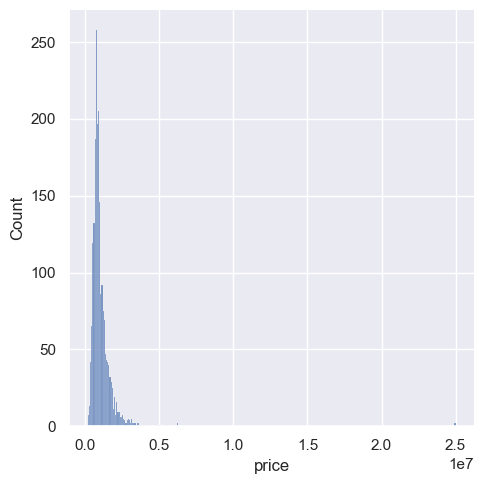

In [100]:
sns.displot(data_clean["price"])

##### Lets drop above q3 + 1,5 * interquartille range in price.

In [101]:
q1 = data_clean["price"].quantile(0.25)
q3 = data_clean["price"].quantile(0.75)
iqr = q3 - q1
outlier_price_upper = q3 + 1.5 * iqr
outlier_price_lower = q1 - 1.5 * iqr

In [102]:
data_price_outliers = data_clean[data_clean["price"].between(outlier_price_lower, outlier_price_upper)]

In [103]:
data_price_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 0 to 2520
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   beds                   1962 non-null   int64  
 1   baths                  1962 non-null   float64
 2   size_in_sqft           1962 non-null   float64
 3   price                  1962 non-null   float64
 4   distance_zip_category  1962 non-null   object 
 5   zip_code_category      1962 non-null   object 
 6   lot_size_in_sqft       1962 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 122.6+ KB


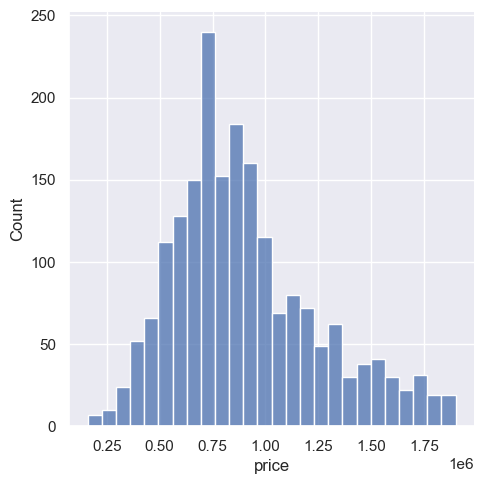

In [104]:
sns.displot(data_price_outliers["price"])

##### Get rid of the beds outliers base on IQR again.

In [105]:
q1 = data_price_outliers["beds"].quantile(0.25)
q3 = data_price_outliers["beds"].quantile(0.75)
iqr = q3 - q1
outlier_beds_upper = q3 + 1.5 * iqr
outlier_beds_lower = q1 - 1.5 * iqr

In [106]:
data_beds_outliers = data_price_outliers[data_price_outliers["beds"].between(outlier_beds_lower, outlier_beds_upper)]

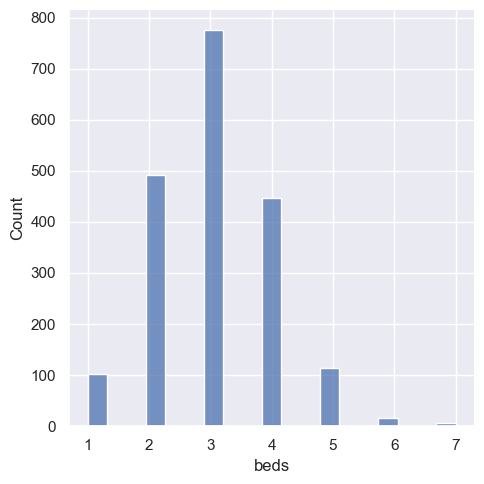

In [107]:
sns.displot(data_beds_outliers["beds"])

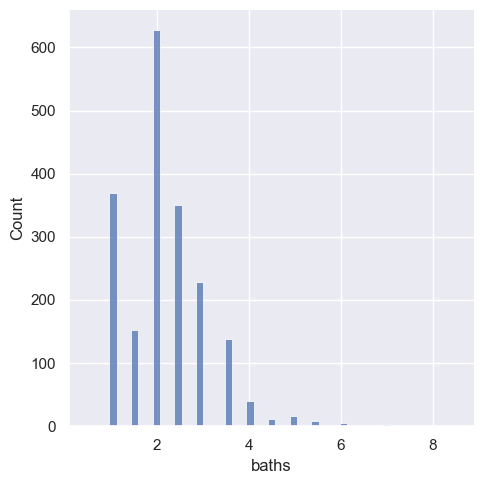

In [108]:
sns.displot(data_beds_outliers["baths"])

##### Get rid of baths outliers based on IQR again.

In [109]:
q1 = data_beds_outliers["baths"].quantile(0.25)
q3 = data_beds_outliers["baths"].quantile(0.75)
iqr = q3 - q1
outlier_baths_upper = q3 + 1.5 * iqr
outlier_baths_lower = q1 - 1.5 * iqr

In [110]:
data_baths_outliers = data_beds_outliers[data_beds_outliers["baths"].between(outlier_baths_lower, outlier_baths_upper)]

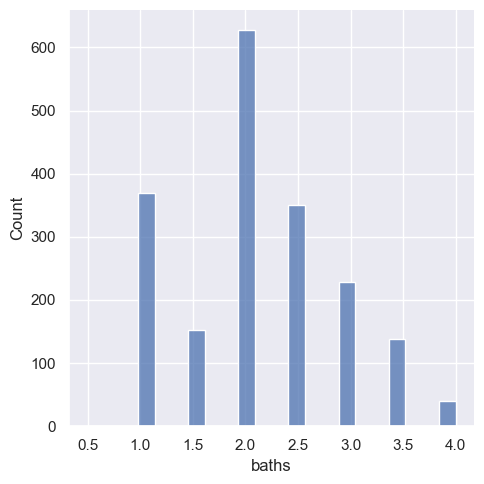

In [111]:
sns.displot(data_baths_outliers["baths"])

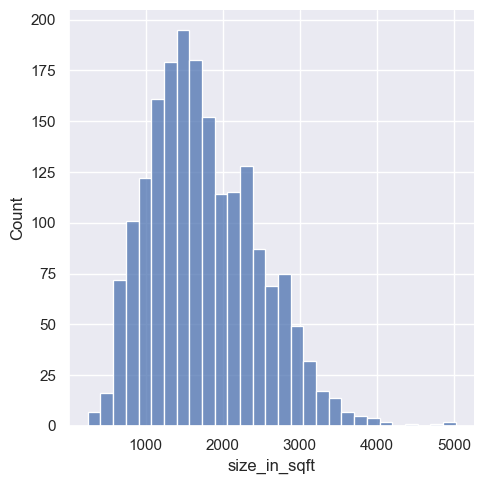

In [112]:
sns.displot(data_baths_outliers["size_in_sqft"])

In [113]:
q = data_baths_outliers["size_in_sqft"].quantile(0.99)
q

3549.5200000000004

In [114]:
q1 = data_baths_outliers["size_in_sqft"].quantile(0.25)
q3 = data_baths_outliers["size_in_sqft"].quantile(0.75)
iqr = q3 - q1
outlier_size_upper = q3 + 1.5 * iqr
outlier_size_lower = q1 - 1.5 * iqr
print(outlier_size_lower, outlier_size_upper)

-304.0 3780.0


In [115]:
data_size_in_sqt_outliers = data_baths_outliers[data_baths_outliers["size_in_sqft"].between(outlier_size_lower, outlier_size_upper)]

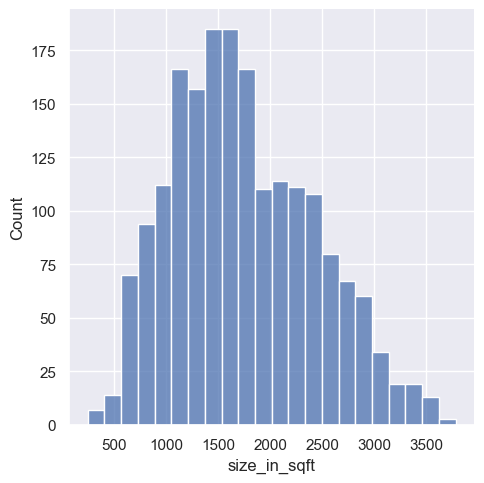

In [116]:
sns.displot(data_size_in_sqt_outliers["size_in_sqft"])

In [117]:
data_size_in_sqt_outliers["lot_size_in_sqft"].describe()

count    1.894000e+03
mean     1.769926e+04
std      2.705523e+05
min      5.000000e+02
25%      2.600000e+03
50%      5.000000e+03
75%      7.235500e+03
max      1.089000e+07
Name: lot_size_in_sqft, dtype: float64

In [118]:
q1 = data_size_in_sqt_outliers["lot_size_in_sqft"].quantile(0.25)
q3 = data_size_in_sqt_outliers["lot_size_in_sqft"].quantile(0.75)
iqr = q3 - q1
outlier_lot_size_upper = q3 + 1.5 * iqr
outlier_lot_size_lower = q1 - 1.5 * iqr

In [119]:
data_prepro = data_size_in_sqt_outliers[data_size_in_sqt_outliers["lot_size_in_sqft"].between(outlier_lot_size_lower, outlier_lot_size_upper)]

In [120]:
data_prepro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1732 entries, 0 to 2520
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   beds                   1732 non-null   int64  
 1   baths                  1732 non-null   float64
 2   size_in_sqft           1732 non-null   float64
 3   price                  1732 non-null   float64
 4   distance_zip_category  1732 non-null   object 
 5   zip_code_category      1732 non-null   object 
 6   lot_size_in_sqft       1732 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 108.2+ KB


In [121]:
data_clean = data_prepro.copy()

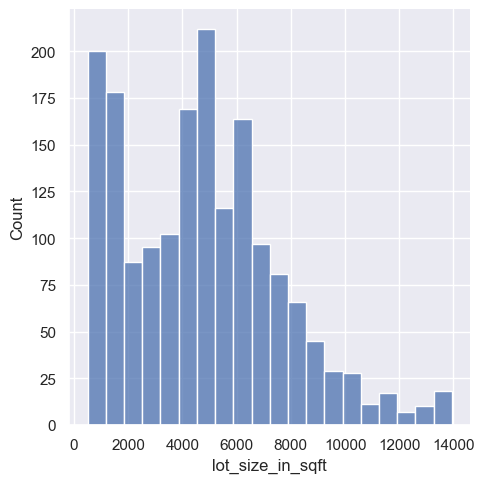

In [122]:
sns.displot(data_clean["lot_size_in_sqft"])

In [123]:
data_clean.describe(include="all")

,beds,baths,size_in_sqft,price,distance_zip_category,zip_code_category,lot_size_in_sqft
count,1732.000000,1732.000000,1732.000000,1.732000e+03,1732,1732,1732.000000
unique,NaN,NaN,NaN,NaN,4,4,NaN
top,NaN,NaN,NaN,NaN,inner ring,middle lower,NaN
freq,NaN,NaN,NaN,NaN,817,760,NaN
mean,3.064665,2.155889,1786.006351,9.143575e+05,NaN,NaN,4749.304273
std,0.947726,0.771537,662.410405,3.297815e+05,NaN,NaN,2868.364768
min,1.000000,0.500000,376.000000,1.594880e+05,NaN,NaN,500.000000
25%,2.000000,1.500000,1290.000000,6.900000e+05,NaN,NaN,2280.000000
50%,3.000000,2.000000,1700.000000,8.500000e+05,NaN,NaN,4800.000000
75%,4.000000,2.500000,2262.500000,1.095000e+06,NaN,NaN,6348.500000


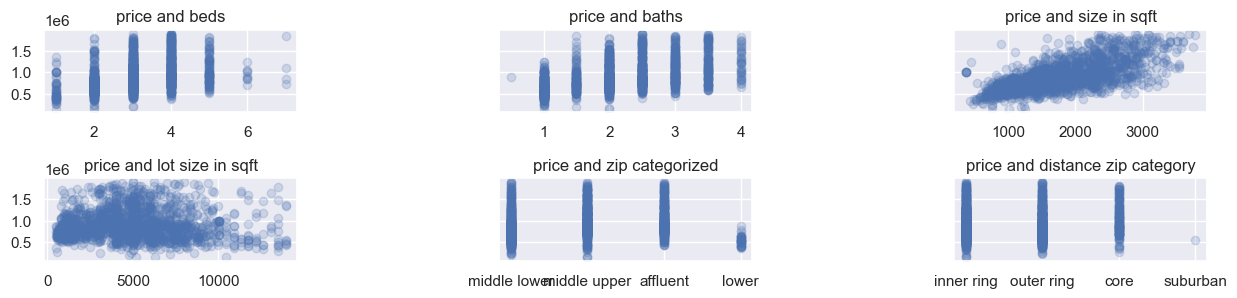

In [140]:
f,axs = plt.subplots(2, 3, sharey=True, figsize =(15,3))
axs[0, 0].scatter(data_clean["beds"],data_clean["price"], alpha=0.2)
axs[0, 0].set_title("price and beds")
axs[0, 1].scatter(data_clean["baths"],data_clean["price"], alpha=0.2)
axs[0, 1].set_title("price and baths")
axs[0, 2].scatter(data_clean["size_in_sqft"],data_clean["price"], alpha=0.2)
axs[0, 2].set_title("price and size in sqft")
axs[1, 0].scatter(data_clean["lot_size_in_sqft"],data_clean["price"], alpha=0.2)
axs[1, 0].set_title("price and lot size in sqft")
axs[1, 1].scatter(data_clean["zip_code_category"],data_clean["price"], alpha=0.2)
axs[1, 1].set_title("price and zip categorized")
axs[1, 2].scatter(data_clean["distance_zip_category"],data_clean["price"], alpha=0.2)
axs[1, 2].set_title("price and distance zip category")

# Increase spacing between rows and columns
plt.subplots_adjust(hspace=0.8, wspace=0.8)

plt.show()

#### Since variable "lot size in sqft" seems to have no impact on the price, I will drop it.

In [141]:
data_clean.drop(columns=["lot_size_in_sqft"], inplace=True, axis = 1)

In [142]:
data_clean.reset_index(drop=True, inplace=True)

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_clean[["beds", 'baths','size_in_sqft']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,18.233408,beds
1,11.377437,baths
2,16.578015,size_in_sqft


### Since the beds and baths are giving higher VIFs, lets drop them. It is logical, that size correlates with number of beds and baths somehow. Until 10, it is kind of acceptable, it is over.

In [144]:
data_clean.drop(columns=["beds", "baths"], inplace=True)

In [151]:
data_final = pd.get_dummies(data_clean, drop_first=True).astype(int)

In [148]:
from sklearn.model_selection import train_test_split

In [152]:
train_data, test_data = train_test_split(data_final, test_size=0.2, random_state=365)

In [157]:
train_data.columns

Index(['size_in_sqft', 'price', 'distance_zip_category_inner ring',
       'distance_zip_category_outer ring', 'distance_zip_category_suburban',
       'zip_code_category_lower', 'zip_code_category_middle lower',
       'zip_code_category_middle upper'],
      dtype='object')

In [155]:
from sklearn.feature_selection import f_regression

In [158]:
x = train_data[["size_in_sqft", 
                'distance_zip_category_inner ring',
                'distance_zip_category_outer ring', 
                'distance_zip_category_suburban',
                'zip_code_category_lower', 
                'zip_code_category_middle lower',
                'zip_code_category_middle upper',
               ]]
y = train_data["price"]

In [159]:
f_regression(x, y)
p_values = f_regression(x, y)[1]
p_values.round(3)

array([0.   , 0.235, 0.   , 0.301, 0.   , 0.   , 0.   ])

### Should exclude distance and do the rest.